<a href="https://colab.research.google.com/github/cmaloney111/CSAI/blob/Main/number.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

(<matplotlib.image.AxesImage at 0x7f87d1fb1fd0>, 5)

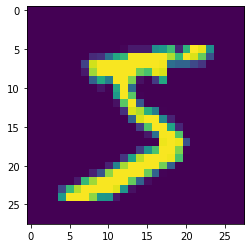

In [ ]:
plt.imshow(x_train[0]), y_train[0]

In [ ]:
# Preprocessing
images = x_train / 255.0
labels = pd.get_dummies(y_train)

In [ ]:
i = 1
y_train[i], np.array(labels[i])

(0, array([0, 0, 0, ..., 0, 0, 0], dtype=uint8))

In [ ]:
y_train.shape

(60000,)

In [ ]:
from tensorflow.keras import layers, Sequential

In [ ]:
input_dim = 28*28
model = Sequential([
    layers.Flatten(),
    layers.Dense(512, activation = "relu"),
    layers.Dense(256, activation = "relu"),
    layers.Dense(128, activation = "relu"),
    layers.Dense(64, activation = "relu"),
    layers.Dense(10, activation = "softmax")
])

In [ ]:
model.compile(optimizer = "adam", loss=tf.losses.CategoricalCrossentropy(), metrics = ["accuracy"])

In [ ]:
history = model.fit(images, labels, batch_size=256, epochs=15, validation_split=0.3)

Epoch 1/15
165/165 [==============================] - 4s 24ms/step - loss: 6.9569e-05 - accuracy: 1.0000 - val_loss: 0.1318 - val_accuracy: 0.9803
Epoch 2/15
165/165 [==============================] - 4s 22ms/step - loss: 2.2996e-05 - accuracy: 1.0000 - val_loss: 0.1341 - val_accuracy: 0.9801
Epoch 3/15
165/165 [==============================] - 4s 23ms/step - loss: 1.7107e-05 - accuracy: 1.0000 - val_loss: 0.1363 - val_accuracy: 0.9804
Epoch 4/15
165/165 [==============================] - 4s 22ms/step - loss: 1.2835e-05 - accuracy: 1.0000 - val_loss: 0.1393 - val_accuracy: 0.9804
Epoch 5/15
165/165 [==============================] - 4s 23ms/step - loss: 9.4396e-06 - accuracy: 1.0000 - val_loss: 0.1427 - val_accuracy: 0.9804
Epoch 6/15
165/165 [==============================] - 4s 23ms/step - loss: 7.0829e-06 - accuracy: 1.0000 - val_loss: 0.1461 - val_accuracy: 0.9804
Epoch 7/15
165/165 [==============================] - 4s 23ms/step - loss: 5.4008e-06 - accuracy: 1.0000 - val_loss: 0

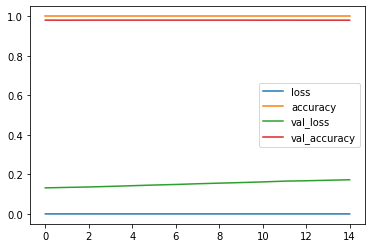

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
test_images = x_test / 255.0
test_labels = pd.get_dummies(y_test)

In [ ]:
predictions = model.predict(test_images)
predictions = np.argmax(predictions, axis = 1)

313/313 [==============================] - 1s 4ms/step


In [ ]:
np.mean(np.equal(predictions, y_test))

0.9822

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
net = confusion_matrix(y_test, predictions)

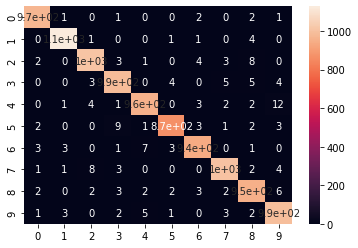

In [ ]:
sns.heatmap(net, annot=True)